In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import math
import matplotlib as mpl
#mpl.use('pdf')
import matplotlib.pyplot as plt
import numpy as np
from collections import OrderedDict
import matplotlib
import seaborn as sns
import scipy

#Red
red1= sns.color_palette("Reds_d",1)
red2= sns.color_palette("Reds_d",2)
red3= sns.color_palette("Reds_d",3)
red4= sns.color_palette("Reds_d",4)
red5= sns.color_palette("Reds_d",5)
red6= sns.color_palette("Reds_d",6)
red7= sns.color_palette("Reds_d",7)
red8= sns.color_palette("Reds_d",8)

#YellowGreen
yg1= sns.color_palette("YlGn_d",1)
yg2= sns.color_palette("YlGn_d",2)
yg3= sns.color_palette("YlGn_d",3)
yg4= sns.color_palette("YlGn_d",4)
yg5= sns.color_palette("YlGn_d",5)
yg7= sns.color_palette("YlGn_d",7)

#GreenBlue
gb1= sns.color_palette("GnBu_d",1)
gb2= sns.color_palette("GnBu_d",2)
gb3= sns.color_palette("GnBu_d",3)
gb4= sns.color_palette("GnBu_d",4)
gb5= sns.color_palette("GnBu_d",5)
gb6= sns.color_palette("GnBu_d",6)
gb7= sns.color_palette("GnBu_d",7)
gb8= sns.color_palette("GnBu_d",8)

cp2 = list(map(lambda x: sns.desaturate(x,0.9),[red7[2],gb7[4]]))
cp2v1 = list(map(lambda x: sns.desaturate(x,0.9),[red7[2],yg7[0]]))
cp3 = list(map(lambda x: sns.desaturate(x,0.9),[yg7[0],gb7[4],red7[2]]))
cp4 = list(map(lambda x: sns.desaturate(x,0.9),[yg7[0],red7[2], yg7[5],gb7[4]]))
cp2_2 = list(map(lambda x: sns.desaturate(x,0.9),[red7[0],red7[3],yg7[1],gb7[4]]))
cp2_1 = list(map(lambda x: sns.desaturate(x,0.9),[red7[0],red7[3],gb7[4]]))
cp3_2 = list(map(lambda x: sns.desaturate(x,0.9),[red7[5],red7[0],red7[3],yg7[1],gb7[4]]))
cp_total_spectrum = list(map(lambda x: sns.desaturate(x,0.9),gb7 + yg7 + red7))

In [2]:
#sns.set_palette(cp2_1) #BLASX, XKBLAS, PARALiA autotune
#sns.set_palette(cp4)
sns.set_palette(cp3_2) #cuBLASXt, BLASX, XKBLAS, PARALiA software, PARALiA autotune
#sns.set_palette(cp2_2) #BLASX, XKBLAS, PARALiA software, PARALiA autotune
sns.color_palette() 

[(0.5228235294117647, 0.2094948096885813, 0.1949619377162629),
 (0.9364108676150199, 0.5331674996796103, 0.44647776496219393),
 (0.850771241830065, 0.21914033064206087, 0.18984390618992708),
 (0.4879192618223761, 0.7401222606689734, 0.4719192618223761),
 (0.2649160579264386, 0.5270152505446624, 0.6269460463924131)]

In [3]:
def CoCoPeLia_log_read(filename):
    temp = pd.read_csv(filename, header=None, names = ['T','dev_num', 'dev_id_token', 'cachesize_limit','TransA','TransB',
                                                    'alpha','beta','M','N','K','Asloc','Bsloc','Csloc', 'CsOutloc', 'timer'], 
                                                     dtype = {'M': np.int64, 'N': np.int64, 'K': np.int64, 'timer': np.float64} )
    temp.sort_values(by=['M','N','K'])
    return temp

def PARALia_log_read(filename):
    temp = pd.read_csv(filename, header=None, names = ['T','dev_num', 'dev_id_token', 'cachesize_limit','TransA','TransB',
                                                    'alpha','beta','M','N','K','Asloc','Bsloc','Csloc', 'CsOutloc', 'timer', 'pred_t', 'pred_J'], 
                                                     dtype = {'M': np.int64, 'N': np.int64, 'K': np.int64, 'timer': np.float64, 'pred_t': np.float64, 'pred_J': np.float64} )
    temp.sort_values(by=['M','N','K'])
    return temp

def keep_dev_num(num, dataframe):
    return dataframe[dataframe['dev_num'] == num]

    
devices=8
machine = 'vulcan'
Mmax = math.sqrt(32*1e9/(3*8))/256 #Tesla-V100
MemMax = 4*(1024*1024*1024)*devices # Questionable limit
Rmax_Gflops = 7*1024*devices
#Mmax = math.sqrt(11*1e9/(3*8))/256 #Tesla-K40
#machine = 'testbed-II_Tesla-V100'

version="1.5"
split="ST-2D-BLOCK-CYCLIC"
sr_over=""
implementation="_UN-PB-L8"
pw_optimize="_PW-PRED-PERF"
homedir = '~/mount/'
benchdir= homedir + 'PhD_stuff/PARALiA-Framework/Benchmarking/Python_Scripts/PARALiA_plotters/Results-24-12-2022'
pw_optimize="_PW-PRED-PERF-PER-J-0.00"
impl_hops="_ALL-HOPS-1-0.20"

pw_optimize="_PW-PRED-PERF-PER-J-0.00"
XKBLAS_nocache_data = PARALia_log_read('%s/%s/XKBLASDgemmRunner_%s_%s%s%s%s_%s.log' %(benchdir, machine, split, sr_over, implementation, impl_hops, pw_optimize, version))
print('XKBLAS_nocache_data len: %d\n' % len(XKBLAS_nocache_data))

CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0 = (PARALia_log_read('%s/%s/CoCoPeLiaDgemmRunner_%s_%s%s%s%s_%s.log' 
                                                                  %(benchdir, machine, split, sr_over, implementation, impl_hops, pw_optimize, version)))
print('CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0 len: %d\n' % len(CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0))

CoCopeLia_data_allhops_02pen_ESPA_alldev = keep_dev_num(8, PARALia_log_read('%s/%s/CoCoPeLiaDgemmRunner_predefined_vals_%s_%s%s%s%s_%s.log' 
                                                                  %(benchdir, machine, split, sr_over, implementation, impl_hops, pw_optimize, version)))
print('CoCopeLia_data_allhops_02pen_ESPA_alldev len: %d\n' % len(CoCopeLia_data_allhops_02pen_ESPA_alldev))

pw_optimize="_PW-PRED-ENERGY-DELAY"
cuBLASXt_best_data = PARALia_log_read('%s/%s/cuBLASXtDgemmRunner_%s_%s%s%s%s_%s.log' %(benchdir, machine, split, sr_over, implementation, impl_hops, pw_optimize, version))
print('cuBLASXt_best_data len: %d\n' % len(cuBLASXt_best_data))

CoCopeLia_data_allhops_02pen_ESPA_pred_EDP = (PARALia_log_read('%s/%s/CoCoPeLiaDgemmRunner_%s_%s%s%s%s_%s.log' 
                                                                  %(benchdir, machine, split, sr_over, implementation, impl_hops, pw_optimize, version)))
print('CoCopeLia_data_allhops_02pen_ESPA_pred_EDP len: %d\n' % len(CoCopeLia_data_allhops_02pen_ESPA_pred_EDP))

pw_optimize="_PW-PRED-POWER-DELAY"
BLASxEx_data = PARALia_log_read('%s/%s/BLASxExDgemmRunner_%s_%s%s%s%s_%s.log' %(benchdir, machine, split, sr_over, implementation, impl_hops, pw_optimize, version))
print('BLASxEx_data len: %d\n' % len(BLASxEx_data))

CoCopeLia_data_allhops_02pen_ESPA_pred_PDP = (PARALia_log_read('%s/%s/CoCoPeLiaDgemmRunner_%s_%s%s%s%s_%s.log' 
                                                                  %(benchdir, machine, split, sr_over, implementation, impl_hops, pw_optimize, version)))
print('CoCopeLia_data_allhops_02pen_ESPA_pred_PDP len: %d\n' % len(CoCopeLia_data_allhops_02pen_ESPA_pred_PDP))

version="2.0"
split="ST-2D-BLOCK-CYCLIC"
implementation="_UN-PB-L8"
sk_fire="SK-RD"
algo="ALGO-WR-LAZY"
streaming_overlap="SBO-8"
routing_model="R-CHAIN-QUEUE-ETA-CO-5"
hop_rerouting_model="BW-ETA-HOPS-1-0.20"
ratio_tune_itter="RTI-10"
reordev=""
account_for_tile_sl="_ACCOUNT-TILE-SL"
sk_selection="SK-SELECT-H-ETA-PLUS-PENDING"
pw_optimize="PW-PRED-ENERGY-DELAY"
homedir = '~/mount_vulcan/'
benchdir= homedir + 'PhD_stuff/PARALiA-Framework/vulcan-build/vulcan_8V100-install/Benchmarking/testLogs'

PARALiA2_data_pred_EDP = (PARALia_log_read('%s/CoCoPeLiaDgemmRunner_%s_%s_%s_%s_%s_%s_%s_%s%s%s_%s_%s_%s.log' 
                                                                  %(benchdir, split, implementation, sk_fire, algo, streaming_overlap, routing_model, hop_rerouting_model, ratio_tune_itter, reordev, account_for_tile_sl, sk_selection, pw_optimize, version)))
print('PARALiA2_data_pred_EDP len: %d\n' % len(PARALiA2_data_pred_EDP))

PARALiA2_data_alldev = keep_dev_num(8, PARALia_log_read('%s/CoCoPeLiaDgemmRunner_predefined_vals_%s_%s_%s_%s_%s_%s_%s_%s%s%s_%s_%s_%s.log' 
                                                                  %(benchdir, split, implementation, sk_fire, algo, streaming_overlap, routing_model, hop_rerouting_model, ratio_tune_itter, reordev, account_for_tile_sl, sk_selection, pw_optimize, version)))
print('PARALiA2_data_alldev len: %d\n' % len(PARALiA2_data_alldev))

XKBLAS_nocache_data len: 11610

CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0 len: 60600

CoCopeLia_data_allhops_02pen_ESPA_alldev len: 60600

cuBLASXt_best_data len: 11700

CoCopeLia_data_allhops_02pen_ESPA_pred_EDP len: 60200

BLASxEx_data len: 11700

CoCopeLia_data_allhops_02pen_ESPA_pred_PDP len: 60600

PARALiA2_data_pred_EDP len: 1800

PARALiA2_data_alldev len: 1260



In [4]:
def CoCoPeLia_grouby_avg(df):
    result = df.groupby(['T','dev_num', 'dev_id_token', 'cachesize_limit','TransA','TransB',
        'alpha','beta','M','N','K','Asloc','Bsloc','Csloc', 'CsOutloc'], as_index=False, sort=True).mean()
    #print(result)
    return result

def CoCoPeLia_modified_grouby_avg(df):
    result = df.groupby(['T','dev_num', 'dev_id_token', 'cachesize_limit','TransA','TransB',
        'alpha','beta','M','N','K','Asloc','Bsloc','Csloc', 'CsOutloc', 'flops', 'bytes', 'loc_str', 'imp'], as_index=False, sort=True).mean()
    #print(result)
    return result

def CoCoPeLia_modified_grouby_max(df):
    result = df.groupby(['T','dev_num', 'dev_id_token', 'cachesize_limit','TransA','TransB',
        'alpha','beta','M','N','K','Asloc','Bsloc','Csloc', 'CsOutloc', 'flops', 'bytes', 'loc_str', 'imp'], as_index=False, sort=True).max()
    #print(result)
    return result

def CoCoPeLia_grouby_min(df):
    return df.groupby(['T','dev_num', 'dev_id_token', 'cachesize_limit','TransA','TransB',
        'alpha','beta','M','N','K','Asloc','Bsloc','Csloc', 'CsOutloc'], as_index=False, sort=True).min()

def CoCoPeLia_select_subset(df, subset_str):
    if subset_str == 'square': 
        return df.loc[(df['M'] == df['N']) & (df['M'] == df['K'])]
    elif subset_str == 'fat-thin':
        return df.loc[(df['M'] == df['N']) & (df['M'] > df['K'])]
    elif subset_str == 'thin-fat':        
        return df.loc[(df['M'] == df['N']) & (df['M'] < df['K'])]
    
def CoCoPeLia_select_indata_locs(df, loc1, loc2, loc3):
    return df.loc[(df['Asloc'] == loc1) & (df['Bsloc'] == loc2) & (df['Csloc'] == loc3) & (df['M'] == df['N']) & (df['M'] < df['K'])]

In [5]:
font=8
#plt.rc('font', family='serif', serif='Times') #annoying warning filling my view, so disabled until needed
#plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=font)
plt.rc('ytick', labelsize=font)
plt.rc('axes', labelsize=font)
plt.rc('figure', titlesize=font)
# width as measured in inkscape
width = 3.487
height = width / 1.618

#fig, ax = plt.subplots()
#fig.subplots_adjust(left=.15, bottom=.17, right=.99, top=.97)

In [6]:
def dgemm_flops(df):
    df['flops'] = df['M']*df['N']*(2*df['K'] + 2)
    return df['M']*df['N']*(2*df['K'] + 2)
def dgemm_bytes(df):
    df['bytes'] = 8*(df['M']*(df['N']+df['K']) + df['N']*df['K']) 
    return 8*(df['M']*(df['N']+df['K']) + df['N']*df['K']) 

In [7]:
dev_W_avg = (CoCopeLia_data_allhops_02pen_ESPA_pred_EDP['pred_J']/CoCopeLia_data_allhops_02pen_ESPA_pred_EDP['pred_t']/CoCopeLia_data_allhops_02pen_ESPA_pred_EDP['dev_num']).mean()
print(dev_W_avg)

dgemm_bytes(cuBLASXt_best_data)
dgemm_flops(cuBLASXt_best_data)
cuBLASXt_best_data['pred_t'] = cuBLASXt_best_data['pred_J'] = 0
cuBLASXt_best_data['perf'] = cuBLASXt_best_data['flops']/(1e9*cuBLASXt_best_data['timer'])
cuBLASXt_best_data['energy'] = cuBLASXt_best_data['timer']*(dev_W_avg*8)
cuBLASXt_best_data['EDP'] = (cuBLASXt_best_data['perf'])*(cuBLASXt_best_data['perf'])/(dev_W_avg*8)
cuBLASXt_best_data['PDP'] = cuBLASXt_best_data['flops']/(1e9*cuBLASXt_best_data['energy'])
cuBLASXt_best_data['loc_str'] = 100*(cuBLASXt_best_data['Asloc']+1) + 10*(cuBLASXt_best_data['Bsloc']+1) + cuBLASXt_best_data['Csloc']+1
cuBLASXt_best_data['imp'] = '0.cuBLASXt'

print("cuBLASXt_best_data mean of %d cases -> perf = (ar = %lf, ar/ar = %lf, harmonic = %lf) Gflops/s, Energy = %lf J, PDP = %lf, EDP = %lf" % 
          (len(CoCoPeLia_modified_grouby_avg(cuBLASXt_best_data)), 
           CoCoPeLia_modified_grouby_avg(cuBLASXt_best_data)['perf'].mean(),
           CoCoPeLia_modified_grouby_avg(cuBLASXt_best_data)['flops'].mean()/CoCoPeLia_modified_grouby_avg(cuBLASXt_best_data)['timer'].mean()/1e9, 
           scipy.stats.hmean(CoCoPeLia_modified_grouby_avg(cuBLASXt_best_data).loc[:,'perf']),
           CoCoPeLia_modified_grouby_avg(cuBLASXt_best_data)['energy'].mean(),  CoCoPeLia_modified_grouby_avg(cuBLASXt_best_data)['PDP'].mean(),  CoCoPeLia_modified_grouby_avg(cuBLASXt_best_data)['EDP'].mean()))

dgemm_bytes(BLASxEx_data)
dgemm_flops(BLASxEx_data)
BLASxEx_data['pred_t'] = BLASxEx_data['pred_J'] = 0
BLASxEx_data['perf'] = BLASxEx_data['flops']/(1e9*BLASxEx_data['timer'])
BLASxEx_data['energy'] = BLASxEx_data['timer']*(dev_W_avg*8)
BLASxEx_data['EDP'] = (BLASxEx_data['perf'])*(BLASxEx_data['perf'])/(dev_W_avg*8)
BLASxEx_data['PDP'] = BLASxEx_data['flops']/(1e9*BLASxEx_data['energy'])
BLASxEx_data['loc_str'] = 100*(BLASxEx_data['Asloc']+1) + 10*(BLASxEx_data['Bsloc']+1) + BLASxEx_data['Csloc']+1
BLASxEx_data['imp'] = '1.BLASX'
print("BLASxEx_data mean of %d cases -> perf = (ar = %lf, ar/ar = %lf, harmonic = %lf) Gflops/s Energy = %lf J, PDP = %lf, EDP = %lf" % 
      (len(CoCoPeLia_modified_grouby_avg(BLASxEx_data)), 
        CoCoPeLia_modified_grouby_avg(BLASxEx_data)['perf'].mean(),
        CoCoPeLia_modified_grouby_avg(BLASxEx_data)['flops'].mean()/CoCoPeLia_modified_grouby_avg(BLASxEx_data)['timer'].mean()/1e9, 
        scipy.stats.hmean(CoCoPeLia_modified_grouby_avg(BLASxEx_data).loc[:,'perf']),
       CoCoPeLia_modified_grouby_avg(BLASxEx_data)['energy'].mean(), CoCoPeLia_modified_grouby_avg(BLASxEx_data)['PDP'].mean() , CoCoPeLia_modified_grouby_avg(BLASxEx_data)['EDP'].mean()))

dgemm_bytes(XKBLAS_nocache_data)
dgemm_flops(XKBLAS_nocache_data)
XKBLAS_nocache_data['pred_t'] = XKBLAS_nocache_data['pred_J'] = 0
XKBLAS_nocache_data['perf'] = XKBLAS_nocache_data['flops']/(1e9*XKBLAS_nocache_data['timer'])
XKBLAS_nocache_data['energy'] = XKBLAS_nocache_data['timer']*(dev_W_avg*8)
XKBLAS_nocache_data['EDP'] = (XKBLAS_nocache_data['perf'])*(XKBLAS_nocache_data['perf'])/(dev_W_avg*8)
XKBLAS_nocache_data['PDP'] = XKBLAS_nocache_data['flops']/(1e9*XKBLAS_nocache_data['energy'])
XKBLAS_nocache_data['loc_str'] = 100*(XKBLAS_nocache_data['Asloc']+1) + 10*(XKBLAS_nocache_data['Bsloc']+1) + XKBLAS_nocache_data['Csloc']+1
XKBLAS_nocache_data['imp'] = '2.XKBLAS'
print("XKBLAS_nocache_data mean of %d cases -> perf = (ar = %lf, ar/ar = %lf, harmonic = %lf) Gflops/s, Energy = %lf J, PDP = %lf, EDP = %lf" % 
      (len(CoCoPeLia_modified_grouby_avg(XKBLAS_nocache_data)),   
        CoCoPeLia_modified_grouby_avg(XKBLAS_nocache_data)['perf'].mean(),
        CoCoPeLia_modified_grouby_avg(XKBLAS_nocache_data)['flops'].mean()/CoCoPeLia_modified_grouby_avg(XKBLAS_nocache_data)['timer'].mean()/1e9, 
        scipy.stats.hmean(CoCoPeLia_modified_grouby_avg(XKBLAS_nocache_data).loc[:,'perf']),
       CoCoPeLia_modified_grouby_avg(XKBLAS_nocache_data)['energy'].mean(), CoCoPeLia_modified_grouby_avg(XKBLAS_nocache_data)['PDP'].mean(),  CoCoPeLia_modified_grouby_avg(XKBLAS_nocache_data)['EDP'].mean()))

dgemm_bytes(CoCopeLia_data_allhops_02pen_ESPA_alldev)
dgemm_flops(CoCopeLia_data_allhops_02pen_ESPA_alldev)
CoCopeLia_data_allhops_02pen_ESPA_alldev['perf'] = CoCopeLia_data_allhops_02pen_ESPA_alldev['flops']/(1e9*CoCopeLia_data_allhops_02pen_ESPA_alldev['timer'])
CoCopeLia_data_allhops_02pen_ESPA_alldev['energy'] = CoCopeLia_data_allhops_02pen_ESPA_alldev['timer']*(dev_W_avg*CoCopeLia_data_allhops_02pen_ESPA_alldev['dev_num'])
CoCopeLia_data_allhops_02pen_ESPA_alldev['EDP'] = CoCopeLia_data_allhops_02pen_ESPA_alldev['perf']*CoCopeLia_data_allhops_02pen_ESPA_alldev['perf']/(dev_W_avg*CoCopeLia_data_allhops_02pen_ESPA_alldev['dev_num']) 
CoCopeLia_data_allhops_02pen_ESPA_alldev['PDP'] = CoCopeLia_data_allhops_02pen_ESPA_alldev['flops']/(1e9*CoCopeLia_data_allhops_02pen_ESPA_alldev['energy'])
CoCopeLia_data_allhops_02pen_ESPA_alldev['loc_str'] = 100*(CoCopeLia_data_allhops_02pen_ESPA_alldev['Asloc']+1) + 10*(CoCopeLia_data_allhops_02pen_ESPA_alldev['Bsloc']+1) + CoCopeLia_data_allhops_02pen_ESPA_alldev['Csloc']+1
CoCopeLia_data_allhops_02pen_ESPA_alldev['imp'] = '3.PARALia_1.5 AllDev'
print("CoCopeLia_data_allhops_02pen_ESPA_alldev mean of %d cases -> perf = (ar = %lf, ar/ar = %lf, harmonic = %lf) Gflops/s, Energy = %lf J, PDP = %lf, EDP = %lf" % 
      (len(CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_alldev)),  
        CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_alldev)['perf'].mean(),
        CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_alldev)['flops'].mean()/CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_alldev)['timer'].mean()/1e9, 
        scipy.stats.hmean(CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_alldev).loc[:,'perf']),
       CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_alldev)['energy'].mean(), CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_alldev)['PDP'].mean(),  
       CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_alldev)['EDP'].mean()))

dgemm_bytes(CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0)
dgemm_flops(CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0)
CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0['perf'] = CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0['flops']/(1e9*CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0['timer'])
CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0['energy'] = CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0['timer']*(dev_W_avg*CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0['dev_num'])
CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0['EDP'] = CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0['perf']*CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0['perf']/(dev_W_avg*CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0['dev_num'])
CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0['PDP'] = CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0['flops']/(1e9*CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0['energy'])
CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0['loc_str'] = 100*(CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0['Asloc']+1) + 10*(CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0['Bsloc']+1) + CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0['Csloc']+1
CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0['imp'] = '4.PARALia_1.5 PRED-PERF'
print("CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0 mean of %d cases -> perf = (ar = %lf, ar/ar = %lf, harmonic = %lf) Gflops/s, Energy = %lf J, PDP = %lf, EDP = %lf" % 
      (len(CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0)),  
        CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0)['perf'].mean(),
        CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0)['flops'].mean()/CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0)['timer'].mean()/1e9, 
        scipy.stats.hmean(CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0).loc[:,'perf']),
       CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0)['energy'].mean(), CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0)['PDP'].mean(),  
       CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0)['EDP'].mean()))


dgemm_bytes(CoCopeLia_data_allhops_02pen_ESPA_pred_EDP)
dgemm_flops(CoCopeLia_data_allhops_02pen_ESPA_pred_EDP)
CoCopeLia_data_allhops_02pen_ESPA_pred_EDP['perf'] = CoCopeLia_data_allhops_02pen_ESPA_pred_EDP['flops']/(1e9*CoCopeLia_data_allhops_02pen_ESPA_pred_EDP['timer'])
CoCopeLia_data_allhops_02pen_ESPA_pred_EDP['energy'] = CoCopeLia_data_allhops_02pen_ESPA_pred_EDP['timer']*(dev_W_avg*CoCopeLia_data_allhops_02pen_ESPA_pred_EDP['dev_num'])
CoCopeLia_data_allhops_02pen_ESPA_pred_EDP['EDP'] = CoCopeLia_data_allhops_02pen_ESPA_pred_EDP['perf']*CoCopeLia_data_allhops_02pen_ESPA_pred_EDP['perf']/(dev_W_avg*CoCopeLia_data_allhops_02pen_ESPA_pred_EDP['dev_num'])
CoCopeLia_data_allhops_02pen_ESPA_pred_EDP['PDP'] = CoCopeLia_data_allhops_02pen_ESPA_pred_EDP['flops']/(1e9*CoCopeLia_data_allhops_02pen_ESPA_pred_EDP['energy'])
CoCopeLia_data_allhops_02pen_ESPA_pred_EDP['loc_str'] = 100*(CoCopeLia_data_allhops_02pen_ESPA_pred_EDP['Asloc']+1) + 10*(CoCopeLia_data_allhops_02pen_ESPA_pred_EDP['Bsloc']+1) + CoCopeLia_data_allhops_02pen_ESPA_pred_EDP['Csloc']+1
CoCopeLia_data_allhops_02pen_ESPA_pred_EDP['imp'] = '5.PARALia_1.5 PRED-EDP'
print("CoCopeLia_data_allhops_02pen_ESPA_pred_EDP mean of %d cases -> perf = (ar = %lf, ar/ar = %lf, harmonic = %lf) Gflops/s, Energy = %lf J, PDP = %lf, EDP = %lf" % 
      (len(CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_pred_EDP)),  
        CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_pred_EDP)['perf'].mean(),
        CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_pred_EDP)['flops'].mean()/CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_pred_EDP)['timer'].mean()/1e9, 
        scipy.stats.hmean(CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_pred_EDP).loc[:,'perf']),
       CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_pred_EDP)['energy'].mean(), CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_pred_EDP)['PDP'].mean(),
       CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_pred_EDP)['EDP'].mean()))

dgemm_bytes(CoCopeLia_data_allhops_02pen_ESPA_pred_PDP)
dgemm_flops(CoCopeLia_data_allhops_02pen_ESPA_pred_PDP)
CoCopeLia_data_allhops_02pen_ESPA_pred_PDP['perf'] = CoCopeLia_data_allhops_02pen_ESPA_pred_PDP['flops']/(1e9*CoCopeLia_data_allhops_02pen_ESPA_pred_PDP['timer'])
CoCopeLia_data_allhops_02pen_ESPA_pred_PDP['energy'] = CoCopeLia_data_allhops_02pen_ESPA_pred_PDP['timer']*(dev_W_avg*CoCopeLia_data_allhops_02pen_ESPA_pred_PDP['dev_num'])
CoCopeLia_data_allhops_02pen_ESPA_pred_PDP['EDP'] = CoCopeLia_data_allhops_02pen_ESPA_pred_PDP['perf']*CoCopeLia_data_allhops_02pen_ESPA_pred_PDP['perf']/(dev_W_avg*CoCopeLia_data_allhops_02pen_ESPA_pred_PDP['dev_num'])
CoCopeLia_data_allhops_02pen_ESPA_pred_PDP['PDP'] = CoCopeLia_data_allhops_02pen_ESPA_pred_PDP['flops']/(1e9*CoCopeLia_data_allhops_02pen_ESPA_pred_PDP['energy'])
CoCopeLia_data_allhops_02pen_ESPA_pred_PDP['loc_str'] = 100*(CoCopeLia_data_allhops_02pen_ESPA_pred_PDP['Asloc']+1) + 10*(CoCopeLia_data_allhops_02pen_ESPA_pred_PDP['Bsloc']+1) + CoCopeLia_data_allhops_02pen_ESPA_pred_PDP['Csloc']+1
CoCopeLia_data_allhops_02pen_ESPA_pred_PDP['imp'] = '6.PARALia_1.5 PRED-PDP'
print("CoCopeLia_data_allhops_02pen_ESPA_pred_PDP mean of %d cases -> perf = (ar = %lf, ar/ar = %lf, harmonic = %lf) Gflops/s, Energy = %lf J, PDP = %lf, EDP = %lf" % 
      (len(CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_pred_PDP)),  
        CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_pred_PDP)['perf'].mean(),
        CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_pred_PDP)['flops'].mean()/CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_pred_PDP)['timer'].mean()/1e9, 
        scipy.stats.hmean(CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_pred_PDP).loc[:,'perf']),
       CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_pred_PDP)['energy'].mean(), CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_pred_PDP)['PDP'].mean(),  
       CoCoPeLia_modified_grouby_avg(CoCopeLia_data_allhops_02pen_ESPA_pred_PDP)['EDP'].mean()))

dgemm_bytes(PARALiA2_data_pred_EDP)
dgemm_flops(PARALiA2_data_pred_EDP)
PARALiA2_data_pred_EDP['perf'] = PARALiA2_data_pred_EDP['flops']/(1e9*PARALiA2_data_pred_EDP['timer'])
PARALiA2_data_pred_EDP['energy'] = PARALiA2_data_pred_EDP['timer']*(dev_W_avg*PARALiA2_data_pred_EDP['dev_num'])
PARALiA2_data_pred_EDP['EDP'] = PARALiA2_data_pred_EDP['perf']*PARALiA2_data_pred_EDP['perf']/(dev_W_avg*PARALiA2_data_pred_EDP['dev_num'])
PARALiA2_data_pred_EDP['PDP'] = PARALiA2_data_pred_EDP['flops']/(1e9*PARALiA2_data_pred_EDP['energy'])
PARALiA2_data_pred_EDP['loc_str'] = 100*(PARALiA2_data_pred_EDP['Asloc']+1) + 10*(PARALiA2_data_pred_EDP['Bsloc']+1) + PARALiA2_data_pred_EDP['Csloc']+1
PARALiA2_data_pred_EDP['imp'] = '7.PARALia_2 PRED-EDP'
print("PARALiA2_data_pred_EDP mean of %d cases -> perf = (ar = %lf, ar/ar = %lf, harmonic = %lf) Gflops/s, Energy = %lf J, PDP = %lf, EDP = %lf" % 
      (len(CoCoPeLia_modified_grouby_avg(PARALiA2_data_pred_EDP)),  
        CoCoPeLia_modified_grouby_avg(PARALiA2_data_pred_EDP)['perf'].mean(),
        CoCoPeLia_modified_grouby_avg(PARALiA2_data_pred_EDP)['flops'].mean()/CoCoPeLia_modified_grouby_avg(PARALiA2_data_pred_EDP)['timer'].mean()/1e9, 
        scipy.stats.hmean(CoCoPeLia_modified_grouby_avg(PARALiA2_data_pred_EDP).loc[:,'perf']),
       CoCoPeLia_modified_grouby_avg(PARALiA2_data_pred_EDP)['energy'].mean(), CoCoPeLia_modified_grouby_avg(PARALiA2_data_pred_EDP)['PDP'].mean(),  
       CoCoPeLia_modified_grouby_avg(PARALiA2_data_pred_EDP)['EDP'].mean()))

dgemm_bytes(PARALiA2_data_alldev)
dgemm_flops(PARALiA2_data_alldev)
PARALiA2_data_alldev['perf'] = PARALiA2_data_alldev['flops']/(1e9*PARALiA2_data_alldev['timer'])
PARALiA2_data_alldev['energy'] = PARALiA2_data_alldev['timer']*(dev_W_avg*PARALiA2_data_alldev['dev_num'])
PARALiA2_data_alldev['EDP'] = PARALiA2_data_alldev['perf']*PARALiA2_data_alldev['perf']/(dev_W_avg*PARALiA2_data_alldev['dev_num'])
PARALiA2_data_alldev['PDP'] = PARALiA2_data_alldev['flops']/(1e9*PARALiA2_data_alldev['energy'])
PARALiA2_data_alldev['loc_str'] = 100*(PARALiA2_data_alldev['Asloc']+1) + 10*(PARALiA2_data_alldev['Bsloc']+1) + PARALiA2_data_alldev['Csloc']+1
PARALiA2_data_alldev['imp'] = '8.PARALia_2 Alldev'
print("PARALiA2_data_alldev mean of %d cases -> perf = (ar = %lf, ar/ar = %lf, harmonic = %lf) Gflops/s, Energy = %lf J, PDP = %lf, EDP = %lf" % 
      (len(CoCoPeLia_modified_grouby_avg(PARALiA2_data_alldev)),  
        CoCoPeLia_modified_grouby_avg(PARALiA2_data_alldev)['perf'].mean(),
        CoCoPeLia_modified_grouby_avg(PARALiA2_data_alldev)['flops'].mean()/CoCoPeLia_modified_grouby_avg(PARALiA2_data_alldev)['timer'].mean()/1e9, 
        scipy.stats.hmean(CoCoPeLia_modified_grouby_avg(PARALiA2_data_alldev).loc[:,'perf']),
       CoCoPeLia_modified_grouby_avg(PARALiA2_data_alldev)['energy'].mean(), CoCoPeLia_modified_grouby_avg(PARALiA2_data_alldev)['PDP'].mean(),  
       CoCoPeLia_modified_grouby_avg(PARALiA2_data_alldev)['EDP'].mean()))

289.4933093663051
cuBLASXt_best_data mean of 630 cases -> perf = (ar = 5168.452387, ar/ar = 7484.023252, harmonic = 1647.450503) Gflops/s, Energy = 1611.890671 J, PDP = 2.231680, EDP = 18077.501869
BLASxEx_data mean of 630 cases -> perf = (ar = 14190.641465, ar/ar = 21486.349940, harmonic = 5445.782362) Gflops/s Energy = 561.446095 J, PDP = 6.127362, EDP = 141700.058149
XKBLAS_nocache_data mean of 621 cases -> perf = (ar = 11413.707568, ar/ar = 15895.868007, harmonic = 3157.492579) Gflops/s, Energy = 724.109012 J, PDP = 4.928312, EDP = 102331.241125
CoCopeLia_data_allhops_02pen_ESPA_alldev mean of 630 cases -> perf = (ar = 26720.992452, ar/ar = 39996.456617, harmonic = 4285.088533) Gflops/s, Energy = 301.612400 J, PDP = 11.537828, EDP = 459853.528461
CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0 mean of 630 cases -> perf = (ar = 27072.431143, ar/ar = 40932.726138, harmonic = 6068.621404) Gflops/s, Energy = 288.341151 J, PDP = 12.601936, EDP = 468422.813669
CoCopeLia_data_allhops_02pen_E

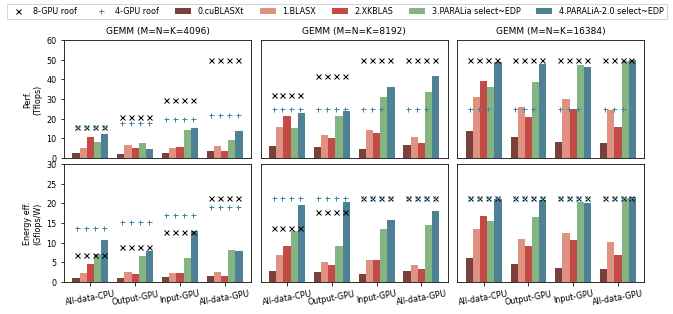

In [8]:
def CoCoPeLia_select_motivation_data_16384(df):
    return df.loc[((df['M']*df['N']*df['K'] >= 15400**3) & (df['M']*df['N']*df['K'] <= 16384**3)) & 
                    (((df['Asloc'] == -1) & (df['Bsloc'] == -1) & (df['Csloc'] == -1)) |
                    ((df['Asloc'] == -1) & (df['Bsloc'] == -1) & (df['Csloc'] == 0))  | 
                     ((df['Asloc'] == 0) & (df['Bsloc'] == 0) & (df['Csloc'] == -1))  | 
                     ((df['Asloc'] == 0) & (df['Bsloc'] == 0) & (df['Csloc'] == 0)) #|
                    #((df['Asloc'] == 0) & (df['Bsloc'] == 1) & (df['Csloc'] == 2))
                    )]
def CoCoPeLia_select_motivation_data_8192(df):
    return df.loc[((df['M']*df['N']*df['K'] >= 8192**3) & (df['M']*df['N']*df['K'] <= 8192**3)) & 
                    (((df['Asloc'] == -1) & (df['Bsloc'] == -1) & (df['Csloc'] == -1)) |
                    ((df['Asloc'] == -1) & (df['Bsloc'] == -1) & (df['Csloc'] == 0))  | 
                     ((df['Asloc'] == 0) & (df['Bsloc'] == 0) & (df['Csloc'] == -1))  | 
                     ((df['Asloc'] == 0) & (df['Bsloc'] == 0) & (df['Csloc'] == 0)) #|
                     #((df['Asloc'] == 0) & (df['Bsloc'] == 1) & (df['Csloc'] == 2))
                    )] 

def CoCoPeLia_select_motivation_data_4096(df):
    return df.loc[((df['M']*df['N']*df['K'] >= 4096**3) & (df['M']*df['N']*df['K'] <= 4096**3)) & 
                    (((df['Asloc'] == -1) & (df['Bsloc'] == -1) & (df['Csloc'] == -1)) |
                    ((df['Asloc'] == -1) & (df['Bsloc'] == -1) & (df['Csloc'] == 0))  | 
                     ((df['Asloc'] == 0) & (df['Bsloc'] == 0) & (df['Csloc'] == -1))  | 
                     ((df['Asloc'] == 0) & (df['Bsloc'] == 0) & (df['Csloc'] == 0)) #|
                     #((df['Asloc'] == 0) & (df['Bsloc'] == 1) & (df['Csloc'] == 2))
                    )] 

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value
        # we change the bar width
        patch.set_width(new_value)
        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

def throughput_select(thr1, thr2, loc):
    if loc == -1: return thr1
    else: return thr2

def gemm_tr_roof(M, N, K, Aloc, Bloc, Cloc, devices):
    #print("M = %d, N = %d, K = %d, Aloc = %d, Bloc =%d, Cloc = %d"%(M,N,K,Aloc,Bloc,Cloc))
    if machine == 'vulcan':
        perf = 6.9
        throughput  = 13
        channels = 4
        throughput_GPU = 24
        paral_cost = 0.1
    else:
        print("Error: Unkown machine")
    exec_t = (1.0*M*N*K*2)/1e12/(perf*devices)
    thr_A = throughput_select(min(channels, devices)*throughput, (devices-1)*throughput_GPU, Aloc)
    thr_B = throughput_select(min(channels, devices)*throughput, (devices-1)*throughput_GPU, Bloc)
    thr_C = throughput_select(min(channels, devices)*throughput, (devices-1)*throughput_GPU, Cloc)
    transfer_t = 8*M*K/1e9/thr_A + 8*N*K/1e9/thr_B + 8*M*N/1e9/thr_C
    perf_roof = (M*N*K*2)/1e12/(max(exec_t, transfer_t))*(1-paral_cost)
    #print("M = %d, N = %d, K = %d, Aloc = %d, Bloc =%d, Cloc = %d => exec_t = %.3lf ms, transfer_t = %.3lf ms => Perf = %.2lf Tflops" %(M,N,K,Aloc,Bloc,Cloc,1e3*exec_t, 1e3*transfer_t,perf_roof))
    return perf_roof
        
plot_motiv = 1
if plot_motiv == 1: #Plot perf and PDP together
    CoCopeLia_all_data_alldev = pd.concat([BLASxEx_data,XKBLAS_nocache_data])
    CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,cuBLASXt_best_data])
    #CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_allhops_02pen_ESPA_alldev])
    #CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,PARALiA2_data_alldev])
    CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_allhops_02pen_ESPA_pred_EDP])
    CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,PARALiA2_data_pred_EDP])
    
    #CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_1])
    #CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0])
    #CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_allhops_02pen_ESPA_predef_dev_4_1])
    #CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_allhops_02pen_ESPA_predef_dev_4_2])
    #CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_allhops_02pen_ESPA_predef_dev_6_1])

    CoCopeLia_all_data_4096 = CoCoPeLia_select_motivation_data_4096(CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_alldev))
    #CoCopeLia_all_data_mean['loc_str'] = list(map(lambda x: str(x) +  '_4096', CoCopeLia_all_data_mean['loc_str']))
    CoCopeLia_all_data_4096["pred_perf"] = CoCopeLia_all_data_4096['flops']/(1e9*CoCopeLia_all_data_4096['pred_t'])

    CoCopeLia_all_data_8192 = CoCoPeLia_select_motivation_data_8192(CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_alldev))
    #CoCopeLia_all_data_tmp['loc_str'] = list(map(lambda x: str(x) +  '_8192', CoCopeLia_all_data_tmp['loc_str']))
    CoCopeLia_all_data_8192["pred_perf"] = CoCopeLia_all_data_8192['flops']/(1e9*CoCopeLia_all_data_8192['pred_t'])

    CoCopeLia_all_data_16384 = CoCoPeLia_select_motivation_data_16384(CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_alldev))
    CoCopeLia_all_data_16384["pred_perf"] = CoCopeLia_all_data_16384['flops']/(1e9*CoCopeLia_all_data_16384['pred_t'])
    #print(CoCopeLia_all_data_16384)

    CoCopeLia_all_data_alldev_list = []
    CoCopeLia_all_data_alldev_list.append(CoCoPeLia_select_subset(CoCopeLia_all_data_4096,'square'))
    CoCopeLia_all_data_alldev_list.append(CoCoPeLia_select_subset(CoCopeLia_all_data_8192,'square'))
    CoCopeLia_all_data_alldev_list.append(CoCoPeLia_select_subset(CoCopeLia_all_data_16384,'square'))    
    #CoCopeLia_all_data_alldev_list.append(CoCoPeLia_select_subset(CoCopeLia_all_data_mean,'fat-thin'))
    #CoCopeLia_all_data_alldev_list.append(CoCoPeLia_select_subset(CoCopeLia_all_data_mean,'thin-fat'))
    elem_name=['GEMM (M=N=K=4096)', 'GEMM (M=N=K=8192)', 'GEMM (M=N=K=16384)']
    fig, ax = plt.subplots(2,3)
    for ctr in range(0,len(ax[0])):
        CoCopeLia_all_data_alldev_list[ctr].loc[CoCopeLia_all_data_alldev_list[ctr]['imp'] == '5.PARALia_1.5 PRED-EDP', 'imp'] = '3.PARALia select~EDP'
        CoCopeLia_all_data_alldev_list[ctr].loc[CoCopeLia_all_data_alldev_list[ctr]['imp'] == '7.PARALia_2 PRED-EDP', 'imp'] = '4.PARALiA-2.0 select~EDP'
        CoCopeLia_all_data_alldev_list[ctr].loc[CoCopeLia_all_data_alldev_list[ctr]['imp'] == '6.PARALia_1.5 Alldev', 'imp'] = '3.PARALiA Alldev'
        CoCopeLia_all_data_alldev_list[ctr].loc[CoCopeLia_all_data_alldev_list[ctr]['imp'] == '8.PARALia_2 Alldev', 'imp'] = '4.PARALiA-2.0 Alldev'
        CoCopeLia_all_data_alldev_list[ctr].sort_values(inplace = True, ignore_index = True, by = ['imp','loc_str'])
        CoCopeLia_all_data_alldev_list[ctr]['Tflops'] = CoCopeLia_all_data_alldev_list[ctr]['perf']/1000
        #print(CoCopeLia_all_data_alldev_list[ctr][CoCopeLia_all_data_alldev_list[ctr]['imp'] == '3.PARALia_1.5 AllDev'])
        CopeLia_all_data_pred =  pd.concat([CoCopeLia_all_data_alldev_list[ctr][CoCopeLia_all_data_alldev_list[ctr]['imp'] == '3.PARALiA']])
        CopeLia_all_data_pred1 =  pd.concat([CoCopeLia_all_data_alldev_list[ctr][CoCopeLia_all_data_alldev_list[ctr]['imp'] == '2.XKBLAS']])
        #CoCopeLia_all_data_alldev_list[ctr] = CoCopeLia_all_data_alldev_list[ctr][CoCopeLia_all_data_alldev_list[ctr]['imp'] != '3.PARALiA']
        sns.barplot(data=CoCopeLia_all_data_alldev_list[ctr], x = 'loc_str', y = 'Tflops', hue = 'imp', ax=ax[0][ctr], palette = cp3_2)
        #CopeLia_all_data_pred.sort_values(inplace = True, ignore_index = True, by = ['loc_str'])
        #print(CopeLia_all_data_pred)
        perf_pred = [gemm_tr_roof(int(CoCopeLia_all_data_alldev_list[ctr].head(1)['M']),int(CoCopeLia_all_data_alldev_list[ctr].head(1)['N']),int(CoCopeLia_all_data_alldev_list[ctr].head(1)['K']), -1,-1,-1, 8),
                     gemm_tr_roof(int(CoCopeLia_all_data_alldev_list[ctr].head(1)['M']),int(CoCopeLia_all_data_alldev_list[ctr].head(1)['N']),int(CoCopeLia_all_data_alldev_list[ctr].head(1)['K']), -1,-1,0, 8),
                     gemm_tr_roof(int(CoCopeLia_all_data_alldev_list[ctr].head(1)['M']),int(CoCopeLia_all_data_alldev_list[ctr].head(1)['N']),int(CoCopeLia_all_data_alldev_list[ctr].head(1)['K']), 0,0,-1, 8),
                     gemm_tr_roof(int(CoCopeLia_all_data_alldev_list[ctr].head(1)['M']),int(CoCopeLia_all_data_alldev_list[ctr].head(1)['N']),int(CoCopeLia_all_data_alldev_list[ctr].head(1)['K']), 0, 0, 0, 8)]
        ax[0][ctr].plot(list(map(lambda x: x - 0.3, [0,0.2,0.4,0.6,1,1.2,1.4,1.6,2,2.2,2.4,2.6,3,3.2,3.4,3.6])), [perf_pred[0], perf_pred[0], perf_pred[0], perf_pred[0], 
                                                                      perf_pred[1], perf_pred[1], perf_pred[1], perf_pred[1], 
                                                                      perf_pred[2], perf_pred[2], perf_pred[2], perf_pred[2], 
                                                                      perf_pred[3], perf_pred[3], perf_pred[3], perf_pred[3]], 'x', color = 'k', markersize = 5, label = "8-GPU roof")
        perf_pred_half = [gemm_tr_roof(int(CoCopeLia_all_data_alldev_list[ctr].head(1)['M']),int(CoCopeLia_all_data_alldev_list[ctr].head(1)['N']),int(CoCopeLia_all_data_alldev_list[ctr].head(1)['K']), -1,-1,-1, 4),
                     gemm_tr_roof(int(CoCopeLia_all_data_alldev_list[ctr].head(1)['M']),int(CoCopeLia_all_data_alldev_list[ctr].head(1)['N']),int(CoCopeLia_all_data_alldev_list[ctr].head(1)['K']), -1,-1,0, 4),
                     gemm_tr_roof(int(CoCopeLia_all_data_alldev_list[ctr].head(1)['M']),int(CoCopeLia_all_data_alldev_list[ctr].head(1)['N']),int(CoCopeLia_all_data_alldev_list[ctr].head(1)['K']), 0,0,-1, 4),
                     gemm_tr_roof(int(CoCopeLia_all_data_alldev_list[ctr].head(1)['M']),int(CoCopeLia_all_data_alldev_list[ctr].head(1)['N']),int(CoCopeLia_all_data_alldev_list[ctr].head(1)['K']), 0, 0, 0, 4)]
        ax[0][ctr].plot(list(map(lambda x: x - 0.3, [0,0.2,0.4,0.6,1,1.2,1.4,1.6,2,2.2,2.4,2.6,3,3.2,3.4,3.6])), [perf_pred_half[0], perf_pred_half[0], perf_pred_half[0], perf_pred_half[0], 
                                                                      perf_pred_half[1], perf_pred_half[1], perf_pred_half[1], perf_pred_half[1], 
                                                                      perf_pred_half[2], perf_pred_half[2], perf_pred_half[2], perf_pred_half[2], 
                                                                      perf_pred_half[3], perf_pred_half[3], perf_pred_half[3], perf_pred_half[3]], '+', color = cp3_2[4], markersize = 5, label = "4-GPU roof")
        change_width(ax[0][ctr], .16)
        ax[0][ctr].set_ylim([0,60])
        ax[0][ctr].set_title(elem_name[ctr], size = font+1)
        ax[0][ctr].get_legend().remove()
        if(ctr>0): 
            ax[0][ctr].set_yticks([])
            ax[0][ctr].set_ylabel('')
        ax[0][ctr].set_xlabel('')
        ax[0][ctr].set_xticks([])
        ax[0][ctr].set_xticklabels([])
        #ax[0][ctr].set_xticklabels(['All-data-CPU', 'Output-GPU', 'Input-GPU','All-data-GPU'], rotation = 25)
        if ctr == 0: 
            fig.legend(loc = 'upper center',#title="Model",  # Title for the legend
                fontsize=font, fancybox = False, ncol=7)
    #fig.savefig('Plots/MaxDev/Plot_testbed-%s_motivation-perf.pdf' % (machine))
    for ctr in range(0,len(ax[1])):
        CoCopeLia_all_data_alldev_list[ctr]['PDP(Gflops/W)'] = CoCopeLia_all_data_alldev_list[ctr]['flops']/(1e9*CoCopeLia_all_data_alldev_list[ctr]['energy'])
        CoCopeLia_all_data_alldev_list[ctr]['PDP_pred'] = CoCopeLia_all_data_alldev_list[ctr]['flops']/(1e9*CoCopeLia_all_data_alldev_list[ctr]['pred_J'])   
        #CoCopeLia_all_data_alldev_list[ctr].sort_values(inplace = True, ignore_index = True, by = ['loc_str'])
        sns.barplot(data=CoCopeLia_all_data_alldev_list[ctr], x = 'loc_str', y = 'PDP(Gflops/W)', hue = 'imp', ax=ax[1][ctr], palette = cp3_2, linewidth = 1)
        #print(CoCopeLia_all_data_alldev_list[ctr][CoCopeLia_all_data_alldev_list[ctr]['imp'] == '3.PARALia_1.5 AllDev'])
        CopeLia_all_data_EDP_pred =  pd.concat([CoCopeLia_all_data_alldev_list[ctr][CoCopeLia_all_data_alldev_list[ctr]['imp'] == '3.PARALiA']])
        #CoCopeLia_all_data_alldev_list[ctr] = CoCopeLia_all_data_alldev_list[ctr][CoCopeLia_all_data_alldev_list[ctr]['imp'] != '3.PARALiA']
        CopeLia_all_data_EDP_pred.sort_values(inplace = True, ignore_index = True, by = ['loc_str','imp'])
        perf_pred = [gemm_tr_roof(int(CoCopeLia_all_data_alldev_list[ctr].head(1)['M']),int(CoCopeLia_all_data_alldev_list[ctr].head(1)['N']),int(CoCopeLia_all_data_alldev_list[ctr].head(1)['K']), -1,-1,-1, 8)*1e3/(dev_W_avg*8),
                     gemm_tr_roof(int(CoCopeLia_all_data_alldev_list[ctr].head(1)['M']),int(CoCopeLia_all_data_alldev_list[ctr].head(1)['N']),int(CoCopeLia_all_data_alldev_list[ctr].head(1)['K']), -1,-1,0, 8)*1e3/(dev_W_avg*8),
                     gemm_tr_roof(int(CoCopeLia_all_data_alldev_list[ctr].head(1)['M']),int(CoCopeLia_all_data_alldev_list[ctr].head(1)['N']),int(CoCopeLia_all_data_alldev_list[ctr].head(1)['K']), 0,0,-1, 8)*1e3/(dev_W_avg*8),
                     gemm_tr_roof(int(CoCopeLia_all_data_alldev_list[ctr].head(1)['M']),int(CoCopeLia_all_data_alldev_list[ctr].head(1)['N']),int(CoCopeLia_all_data_alldev_list[ctr].head(1)['K']), 0, 0, 0, 8)*1e3/(dev_W_avg*8)]
        ax[1][ctr].plot(list(map(lambda x: x - 0.3, [0,0.2,0.4,0.6,1,1.2,1.4,1.6,2,2.2,2.4,2.6,3,3.2,3.4,3.6])), [perf_pred[0], perf_pred[0], perf_pred[0], perf_pred[0], 
                                                                      perf_pred[1], perf_pred[1], perf_pred[1], perf_pred[1], 
                                                                      perf_pred[2], perf_pred[2], perf_pred[2], perf_pred[2], 
                                                                      perf_pred[3], perf_pred[3], perf_pred[3], perf_pred[3]], 'x', color = 'k', markersize = 5)
        perf_pred_half = [gemm_tr_roof(int(CoCopeLia_all_data_alldev_list[ctr].head(1)['M']),int(CoCopeLia_all_data_alldev_list[ctr].head(1)['N']),int(CoCopeLia_all_data_alldev_list[ctr].head(1)['K']), -1,-1,-1, 4)*1e3/(dev_W_avg*4),
                     gemm_tr_roof(int(CoCopeLia_all_data_alldev_list[ctr].head(1)['M']),int(CoCopeLia_all_data_alldev_list[ctr].head(1)['N']),int(CoCopeLia_all_data_alldev_list[ctr].head(1)['K']), -1,-1,0, 4)*1e3/(dev_W_avg*4),
                     gemm_tr_roof(int(CoCopeLia_all_data_alldev_list[ctr].head(1)['M']),int(CoCopeLia_all_data_alldev_list[ctr].head(1)['N']),int(CoCopeLia_all_data_alldev_list[ctr].head(1)['K']), 0,0,-1, 4)*1e3/(dev_W_avg*4),
                     gemm_tr_roof(int(CoCopeLia_all_data_alldev_list[ctr].head(1)['M']),int(CoCopeLia_all_data_alldev_list[ctr].head(1)['N']),int(CoCopeLia_all_data_alldev_list[ctr].head(1)['K']), 0, 0, 0, 4)*1e3/(dev_W_avg*4)]
        ax[1][ctr].plot(list(map(lambda x: x - 0.3, [0,0.2,0.4,0.6,1,1.2,1.4,1.6,2,2.2,2.4,2.6,3,3.2,3.4,3.6])), [perf_pred_half[0], perf_pred_half[0], perf_pred_half[0], perf_pred_half[0], 
                                                                      perf_pred_half[1], perf_pred_half[1], perf_pred_half[1], perf_pred_half[1], 
                                                                      perf_pred_half[2], perf_pred_half[2], perf_pred_half[2], perf_pred_half[2], 
                                                                      perf_pred_half[3], perf_pred_half[3], perf_pred_half[3], perf_pred_half[3]], '+', color = cp3_2[4], markersize = 5)
        
        change_width(ax[1][ctr], .16)
        ax[1][ctr].set_ylim([0,30])
        ax[1][ctr].set_title('')
        ax[1][ctr].get_legend().remove()
        ax[1][ctr].set_xticks(np.arange(4))
        if(ctr>0): 
            ax[1][ctr].set_yticks([])
            ax[1][ctr].set_ylabel('')
        else:
            ax[0][ctr].set_ylabel('Perf.\n(Tflops)')
            ax[1][ctr].set_ylabel('Energy eff.\n(Gflops/W)')
        ax[1][ctr].set_xlabel('')
        #ax[1][ctr].set_xticklabels(['4096_loc=AllCPU', '8192_loc=AllCPU', '4096_loc=C-GPU', '8192_loc=C-GPU', '4096_loc=A,B-GPU', '8192_loc=A,B-GPU', '4096_loc=AllGPU', '8192_loc=AllGPU', ''], rotation = 25)
        ax[1][ctr].set_xticklabels(['All-data-CPU', 'Output-GPU', 'Input-GPU','All-data-GPU'], rotation = 10)
    fig.set_size_inches(width*10/4, height*2)
    fig.subplots_adjust(left=0.065, bottom=0.1, right=0.99, top=0.88, wspace=0.05, hspace=0.05)
    #fig.savefig('./PlotsPlot_testbed-%s_motivation-full.pdf' % (machine))
    fig.savefig('./Plots/Plot_testbed-%s_motivation-full.png' % (machine), dpi = 1200)
elif plot_motiv == 2: #Plot perf, PDP seperately
    CoCopeLia_all_data_alldev = pd.concat([BLASxEx_data,XKBLAS_nocache_data])
    CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,cuBLASXt_best_data])
    #CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_allhops_02pen_ESPA_alldev])
    CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_allhops_02pen_ESPA_pred_EDP])
    CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,PARALiA2_data_pred_EDP])

    #CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_1])
    #CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0])
    #CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_allhops_02pen_ESPA_predef_dev_4_1])
    #CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_allhops_02pen_ESPA_predef_dev_4_2])
    #CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_allhops_02pen_ESPA_predef_dev_6_1])

    CoCopeLia_all_data_4096 = CoCoPeLia_select_motivation_data_4096(CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_alldev))
    #CoCopeLia_all_data_mean['loc_str'] = list(map(lambda x: str(x) +  '_4096', CoCopeLia_all_data_mean['loc_str']))
    CoCopeLia_all_data_4096["pred_perf"] = CoCopeLia_all_data_4096['flops']/(1e9*CoCopeLia_all_data_4096['pred_t'])

    CoCopeLia_all_data_8192 = CoCoPeLia_select_motivation_data_8192(CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_alldev))
    #CoCopeLia_all_data_tmp['loc_str'] = list(map(lambda x: str(x) +  '_8192', CoCopeLia_all_data_tmp['loc_str']))
    CoCopeLia_all_data_8192["pred_perf"] = CoCopeLia_all_data_8192['flops']/(1e9*CoCopeLia_all_data_8192['pred_t'])

    CoCopeLia_all_data_16384 = CoCoPeLia_select_motivation_data_16384(CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_alldev))
    CoCopeLia_all_data_16384["pred_perf"] = CoCopeLia_all_data_16384['flops']/(1e9*CoCopeLia_all_data_16384['pred_t'])
    #print(CoCopeLia_all_data_16384)

    CoCopeLia_all_data_alldev_list = []
    CoCopeLia_all_data_alldev_list.append(CoCoPeLia_select_subset(CoCopeLia_all_data_4096,'square'))
    CoCopeLia_all_data_alldev_list.append(CoCoPeLia_select_subset(CoCopeLia_all_data_8192,'square'))
    CoCopeLia_all_data_alldev_list.append(CoCoPeLia_select_subset(CoCopeLia_all_data_16384,'square'))    
    #CoCopeLia_all_data_alldev_list.append(CoCoPeLia_select_subset(CoCopeLia_all_data_mean,'fat-thin'))
    #CoCopeLia_all_data_alldev_list.append(CoCoPeLia_select_subset(CoCopeLia_all_data_mean,'thin-fat'))
    elem_name=['GEMM (M=N=K=4096)', 'GEMM (M=N=K=8192)', 'GEMM (M=N=K=16384)']
    fig, ax = plt.subplots(1,3)
    for ctr in range(0,3):
        CoCopeLia_all_data_alldev_list[ctr].loc[CoCopeLia_all_data_alldev_list[ctr]['imp'] == '5.PARALia_1.5 PRED-EDP', 'imp'] = '3.PARALiA'
        CoCopeLia_all_data_alldev_list[ctr].loc[CoCopeLia_all_data_alldev_list[ctr]['imp'] == '7.PARALia_2 PRED-EDP', 'imp'] = '4.PARALiA-2.0 select~EDP'
        CoCopeLia_all_data_alldev_list[ctr].sort_values(inplace = True, ignore_index = True, by = ['imp','loc_str'])
        CoCopeLia_all_data_alldev_list[ctr]['Tflops'] = CoCopeLia_all_data_alldev_list[ctr]['perf']/1000
        #print(CoCopeLia_all_data_alldev_list[ctr][CoCopeLia_all_data_alldev_list[ctr]['imp'] == '3.PARALia_1.5 AllDev'])
        CopeLia_all_data_pred =  pd.concat([CoCopeLia_all_data_alldev_list[ctr][CoCopeLia_all_data_alldev_list[ctr]['imp'] == '3.PARALiA']])
        CopeLia_all_data_pred1 =  pd.concat([CoCopeLia_all_data_alldev_list[ctr][CoCopeLia_all_data_alldev_list[ctr]['imp'] == '2.XKBLAS']])
        #CoCopeLia_all_data_alldev_list[ctr] = CoCopeLia_all_data_alldev_list[ctr][CoCopeLia_all_data_alldev_list[ctr]['imp'] != '3.PARALiA']
        sns.barplot(data=CoCopeLia_all_data_alldev_list[ctr], x = 'loc_str', y = 'Tflops', hue = 'imp', ax=ax[ctr], palette = cp3_2)
        #CopeLia_all_data_pred.sort_values(inplace = True, ignore_index = True, by = ['loc_str'])
        #print(CopeLia_all_data_pred)
        perf_pred = [gemm_tr_roof(int(CoCopeLia_all_data_alldev_list[ctr].head(1)['M']),int(CoCopeLia_all_data_alldev_list[ctr].head(1)['N']),int(CoCopeLia_all_data_alldev_list[ctr].head(1)['K']), -1,-1,-1, 8),
                     gemm_tr_roof(int(CoCopeLia_all_data_alldev_list[ctr].head(1)['M']),int(CoCopeLia_all_data_alldev_list[ctr].head(1)['N']),int(CoCopeLia_all_data_alldev_list[ctr].head(1)['K']), -1,-1,0, 8),
                     gemm_tr_roof(int(CoCopeLia_all_data_alldev_list[ctr].head(1)['M']),int(CoCopeLia_all_data_alldev_list[ctr].head(1)['N']),int(CoCopeLia_all_data_alldev_list[ctr].head(1)['K']), 0,0,-1, 8),
                     gemm_tr_roof(int(CoCopeLia_all_data_alldev_list[ctr].head(1)['M']),int(CoCopeLia_all_data_alldev_list[ctr].head(1)['N']),int(CoCopeLia_all_data_alldev_list[ctr].head(1)['K']), 0, 0, 0, 8)]
        ax[ctr].plot(list(map(lambda x: x - 0.3, [0,0.2,0.4,0.6,1,1.2,1.4,1.6,2,2.2,2.4,2.6,3,3.2,3.4,3.6])), [perf_pred[0], perf_pred[0], perf_pred[0], perf_pred[0], 
                                                                      perf_pred[1], perf_pred[1], perf_pred[1], perf_pred[1], 
                                                                      perf_pred[2], perf_pred[2], perf_pred[2], perf_pred[2], 
                                                                      perf_pred[3], perf_pred[3], perf_pred[3], perf_pred[3]], 'x', color = 'k', markersize = 5, label = "8-GPU roof")
        perf_pred_half = [gemm_tr_roof(int(CoCopeLia_all_data_alldev_list[ctr].head(1)['M']),int(CoCopeLia_all_data_alldev_list[ctr].head(1)['N']),int(CoCopeLia_all_data_alldev_list[ctr].head(1)['K']), -1,-1,-1, 4),
                     gemm_tr_roof(int(CoCopeLia_all_data_alldev_list[ctr].head(1)['M']),int(CoCopeLia_all_data_alldev_list[ctr].head(1)['N']),int(CoCopeLia_all_data_alldev_list[ctr].head(1)['K']), -1,-1,0, 4),
                     gemm_tr_roof(int(CoCopeLia_all_data_alldev_list[ctr].head(1)['M']),int(CoCopeLia_all_data_alldev_list[ctr].head(1)['N']),int(CoCopeLia_all_data_alldev_list[ctr].head(1)['K']), 0,0,-1, 4),
                     gemm_tr_roof(int(CoCopeLia_all_data_alldev_list[ctr].head(1)['M']),int(CoCopeLia_all_data_alldev_list[ctr].head(1)['N']),int(CoCopeLia_all_data_alldev_list[ctr].head(1)['K']), 0, 0, 0, 4)]
        #ax[ctr].plot(list(map(lambda x: x - 0.3, [0,0.2,0.4,0.6,1,1.2,1.4,1.6,2,2.2,2.4,2.6,3,3.2,3.4,3.6])), [perf_pred_half[0], perf_pred_half[0], perf_pred_half[0], perf_pred_half[0], 
        #                                                              perf_pred_half[1], perf_pred_half[1], perf_pred_half[1], perf_pred_half[1], 
        #                                                              perf_pred_half[2], perf_pred_half[2], perf_pred_half[2], perf_pred_half[2], 
        #                                                              perf_pred_half[3], perf_pred_half[3], perf_pred_half[3], perf_pred_half[3]], '+', color = cp3_2[4], markersize = 5, label = "4-GPU roof")
        change_width(ax[ctr], .16)
        ax[ctr].set_ylim([0,60])
        ax[ctr].set_title(elem_name[ctr], size = font+1)
        ax[ctr].get_legend().remove()
        if(ctr>0): 
            ax[ctr].set_yticks([])
            ax[ctr].set_ylabel('')
        else:
            ax[ctr].set_ylabel('Perf.\n(Tflops)')
        if ctr == 0: 
            fig.legend(loc = 'upper center',#title="Model",  # Title for the legend
                fontsize=font, fancybox = False, ncol=7)
        ax[ctr].set_xticks(np.arange(4))
        ax[ctr].set_xlabel('')
        #ax[ctr].set_xticklabels(['4096_loc=AllCPU', '8192_loc=AllCPU', '4096_loc=C-GPU', '8192_loc=C-GPU', '4096_loc=A,B-GPU', '8192_loc=A,B-GPU', '4096_loc=AllGPU', '8192_loc=AllGPU', ''], rotation = 25)
        ax[ctr].set_xticklabels(['All-data-CPU', 'Output-GPU', 'Input-GPU','All-data-GPU'], rotation = 10)
    fig.set_size_inches(width*10/4, height*1.2)
    fig.subplots_adjust(left=0.065, bottom=0.2, right=0.99, top=0.78, wspace=0.05, hspace=0.05)
    fig.savefig('./Plots/Plot_testbed-%s_motivation-perf.png' % (machine), dpi = 1200)

    CoCopeLia_all_data_alldev = pd.concat([BLASxEx_data,XKBLAS_nocache_data])
    CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,cuBLASXt_best_data])
    #CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_allhops_02pen_ESPA_alldev])
    CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_allhops_02pen_ESPA_pred_EDP])
    CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,PARALiA2_data_pred_EDP])
    #CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_0])
    #CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_1])
    #CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_allhops_02pen_ESPA_pred_PPJ_1])

    CoCopeLia_all_data_mean = CoCoPeLia_select_motivation_data_4096(CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_alldev))
    #CoCopeLia_all_data_mean['loc_str'] = list(map(lambda x: str(x) +  '_4096', CoCopeLia_all_data_mean['loc_str']))
    CoCopeLia_all_data_mean["pred_perf"] = CoCopeLia_all_data_mean['flops']/(1e9*CoCopeLia_all_data_mean['pred_t'])

    CoCopeLia_all_data_tmp = CoCoPeLia_select_motivation_data_8192(CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_alldev))
    #CoCopeLia_all_data_tmp['loc_str'] = list(map(lambda x: str(x) +  '_8192', CoCopeLia_all_data_tmp['loc_str']))
    CoCopeLia_all_data_tmp["pred_perf"] = CoCopeLia_all_data_tmp['flops']/(1e9*CoCopeLia_all_data_tmp['pred_t'])

    #CoCopeLia_all_data_mean = pd.concat([CoCopeLia_all_data_mean,CoCopeLia_all_data_tmp]) 
    #CoCopeLia_all_data_mean["pred_perf"] = CoCopeLia_all_data_mean['flops']/(1e9*CoCopeLia_all_data_mean['pred_t'])
    #print(CoCopeLia_all_data_mean)

    CoCopeLia_all_data_alldev_list = []
    CoCopeLia_all_data_alldev_list.append(CoCoPeLia_select_subset(CoCopeLia_all_data_4096,'square'))
    CoCopeLia_all_data_alldev_list.append(CoCoPeLia_select_subset(CoCopeLia_all_data_8192,'square'))
    CoCopeLia_all_data_alldev_list.append(CoCoPeLia_select_subset(CoCopeLia_all_data_16384,'square'))  
    #CoCopeLia_all_data_alldev_list.append(CoCoPeLia_select_subset(CoCopeLia_all_data_mean,'thin-fat'))
    elem_name=['GEMM (M=N=K=4096)', 'GEMM (M=N=K=8192)', 'GEMM (M=N=K=16384)']
    fig, ax = plt.subplots(1,3)
    for ctr in range(0,3):
        CoCopeLia_all_data_alldev_list[ctr].loc[CoCopeLia_all_data_alldev_list[ctr]['imp'] == '5.PARALia_1.5 PRED-EDP', 'imp'] = '3.PARALiA'
        CoCopeLia_all_data_alldev_list[ctr].loc[CoCopeLia_all_data_alldev_list[ctr]['imp'] == '7.PARALia_2 PRED-EDP', 'imp'] = '4.PARALiA-2.0 select~EDP'
        CoCopeLia_all_data_alldev_list[ctr].sort_values(inplace = True, ignore_index = True, by = ['imp'])
        CoCopeLia_all_data_alldev_list[ctr]['PDP(Gflops/W)'] = CoCopeLia_all_data_alldev_list[ctr]['flops']/(1e9*CoCopeLia_all_data_alldev_list[ctr]['energy'])
        CoCopeLia_all_data_alldev_list[ctr]['PDP_pred'] = CoCopeLia_all_data_alldev_list[ctr]['flops']/(1e9*CoCopeLia_all_data_alldev_list[ctr]['pred_J'])   
        #CoCopeLia_all_data_alldev_list[ctr].sort_values(inplace = True, ignore_index = True, by = ['loc_str'])
        sns.barplot(data=CoCopeLia_all_data_alldev_list[ctr], x = 'loc_str', y = 'PDP(Gflops/W)', hue = 'imp', ax=ax[ctr], palette = cp3_2, linewidth = 1)
        #print(CoCopeLia_all_data_alldev_list[ctr][CoCopeLia_all_data_alldev_list[ctr]['imp'] == '3.PARALia_1.5 AllDev'])
        CopeLia_all_data_EDP_pred =  pd.concat([CoCopeLia_all_data_alldev_list[ctr][CoCopeLia_all_data_alldev_list[ctr]['imp'] == '3.PARALiA']])
        #CoCopeLia_all_data_alldev_list[ctr] = CoCopeLia_all_data_alldev_list[ctr][CoCopeLia_all_data_alldev_list[ctr]['imp'] != '3.PARALiA']
        CopeLia_all_data_EDP_pred.sort_values(inplace = True, ignore_index = True, by = ['loc_str','imp'])
        perf_pred = [gemm_tr_roof(int(CoCopeLia_all_data_alldev_list[ctr].head(1)['M']),int(CoCopeLia_all_data_alldev_list[ctr].head(1)['N']),int(CoCopeLia_all_data_alldev_list[ctr].head(1)['K']), -1,-1,-1, 8)*1e3/(dev_W_avg*8),
                     gemm_tr_roof(int(CoCopeLia_all_data_alldev_list[ctr].head(1)['M']),int(CoCopeLia_all_data_alldev_list[ctr].head(1)['N']),int(CoCopeLia_all_data_alldev_list[ctr].head(1)['K']), -1,-1,0, 8)*1e3/(dev_W_avg*8),
                     gemm_tr_roof(int(CoCopeLia_all_data_alldev_list[ctr].head(1)['M']),int(CoCopeLia_all_data_alldev_list[ctr].head(1)['N']),int(CoCopeLia_all_data_alldev_list[ctr].head(1)['K']), 0,0,-1, 8)*1e3/(dev_W_avg*8),
                     gemm_tr_roof(int(CoCopeLia_all_data_alldev_list[ctr].head(1)['M']),int(CoCopeLia_all_data_alldev_list[ctr].head(1)['N']),int(CoCopeLia_all_data_alldev_list[ctr].head(1)['K']), 0, 0, 0, 8)*1e3/(dev_W_avg*8)]
        ax[ctr].plot(list(map(lambda x: x - 0.3, [0,0.2,0.4,0.6,1,1.2,1.4,1.6,2,2.2,2.4,2.6,3,3.2,3.4,3.6])), [perf_pred[0], perf_pred[0], perf_pred[0], perf_pred[0], 
                                                                      perf_pred[1], perf_pred[1], perf_pred[1], perf_pred[1], 
                                                                      perf_pred[2], perf_pred[2], perf_pred[2], perf_pred[2], 
                                                                      perf_pred[3], perf_pred[3], perf_pred[3], perf_pred[3]], 'x', color = 'k', markersize = 5, label = "8-GPU roof")
        perf_pred_half = [gemm_tr_roof(int(CoCopeLia_all_data_alldev_list[ctr].head(1)['M']),int(CoCopeLia_all_data_alldev_list[ctr].head(1)['N']),int(CoCopeLia_all_data_alldev_list[ctr].head(1)['K']), -1,-1,-1, 4)*1e3/(dev_W_avg*4),
                     gemm_tr_roof(int(CoCopeLia_all_data_alldev_list[ctr].head(1)['M']),int(CoCopeLia_all_data_alldev_list[ctr].head(1)['N']),int(CoCopeLia_all_data_alldev_list[ctr].head(1)['K']), -1,-1,0, 4)*1e3/(dev_W_avg*4),
                     gemm_tr_roof(int(CoCopeLia_all_data_alldev_list[ctr].head(1)['M']),int(CoCopeLia_all_data_alldev_list[ctr].head(1)['N']),int(CoCopeLia_all_data_alldev_list[ctr].head(1)['K']), 0,0,-1, 4)*1e3/(dev_W_avg*4),
                     gemm_tr_roof(int(CoCopeLia_all_data_alldev_list[ctr].head(1)['M']),int(CoCopeLia_all_data_alldev_list[ctr].head(1)['N']),int(CoCopeLia_all_data_alldev_list[ctr].head(1)['K']), 0, 0, 0, 4)*1e3/(dev_W_avg*4)]
        ax[ctr].plot(list(map(lambda x: x - 0.3, [0,0.2,0.4,0.6,1,1.2,1.4,1.6,2,2.2,2.4,2.6,3,3.2,3.4,3.6])), [perf_pred_half[0], perf_pred_half[0], perf_pred_half[0], perf_pred_half[0], 
                                                                      perf_pred_half[1], perf_pred_half[1], perf_pred_half[1], perf_pred_half[1], 
                                                                      perf_pred_half[2], perf_pred_half[2], perf_pred_half[2], perf_pred_half[2], 
                                                                      perf_pred_half[3], perf_pred_half[3], perf_pred_half[3], perf_pred_half[3]], '+', color = cp3_2[4], markersize = 5, label = "4-GPU roof")
        
        change_width(ax[ctr], .16)
        ax[ctr].set_ylim([0,30])
        ax[ctr].set_title(elem_name[ctr], size = font+1)
        ax[ctr].get_legend().remove()
        if(ctr>0): 
            ax[ctr].set_yticks([])
            ax[ctr].set_ylabel('')
        else:
            ax[ctr].set_ylabel('Energy eff.\n(Gflops/W)')
        if ctr == 0: 
            fig.legend(loc = 'upper center',#title="Model",  # Title for the legend
                fontsize=font, fancybox = False, ncol=7)
        ax[ctr].set_xticks(np.arange(4))
        ax[ctr].set_xlabel('')
        #ax[ctr].set_xticklabels(['4096_loc=AllCPU', '8192_loc=AllCPU', '4096_loc=C-GPU', '8192_loc=C-GPU', '4096_loc=A,B-GPU', '8192_loc=A,B-GPU', '4096_loc=AllGPU', '8192_loc=AllGPU', ''], rotation = 25)
        ax[ctr].set_xticklabels(['All-data-CPU', 'Output-GPU', 'Input-GPU','All-data-GPU'], rotation = 10)
    fig.set_size_inches(width*10/4, height*1.2)
    fig.subplots_adjust(left=0.065, bottom=0.2, right=0.99, top=0.78, wspace=0.05, hspace=0.05)
    fig.savefig('./Plots/Plot_testbed-%s_motivation-pdp.png' % (machine), dpi = 1200)

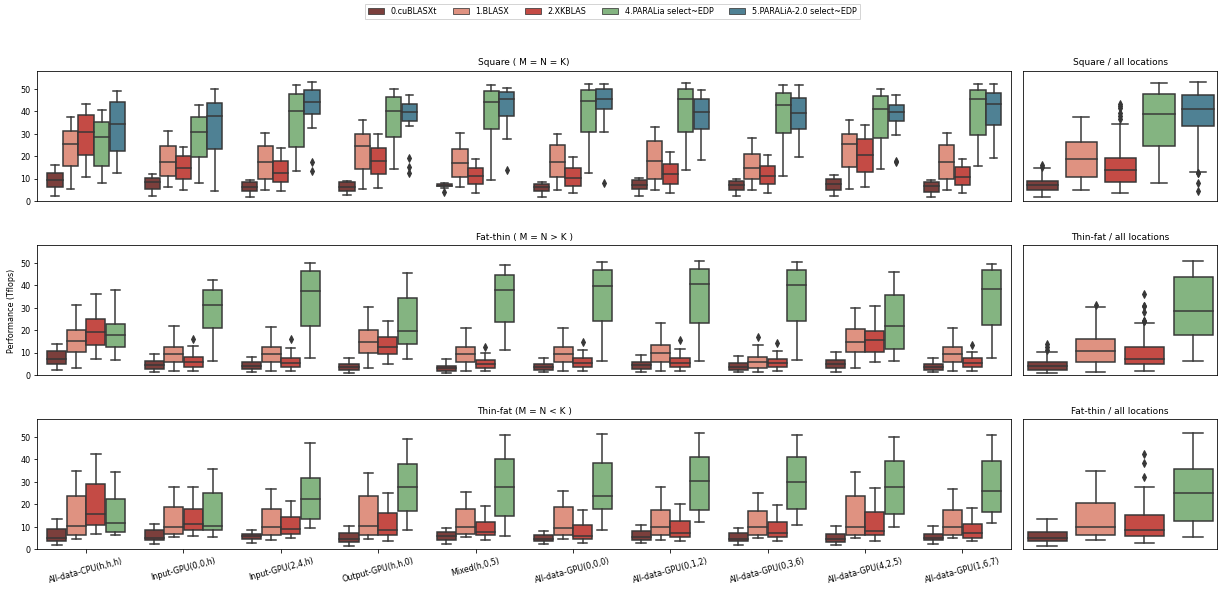

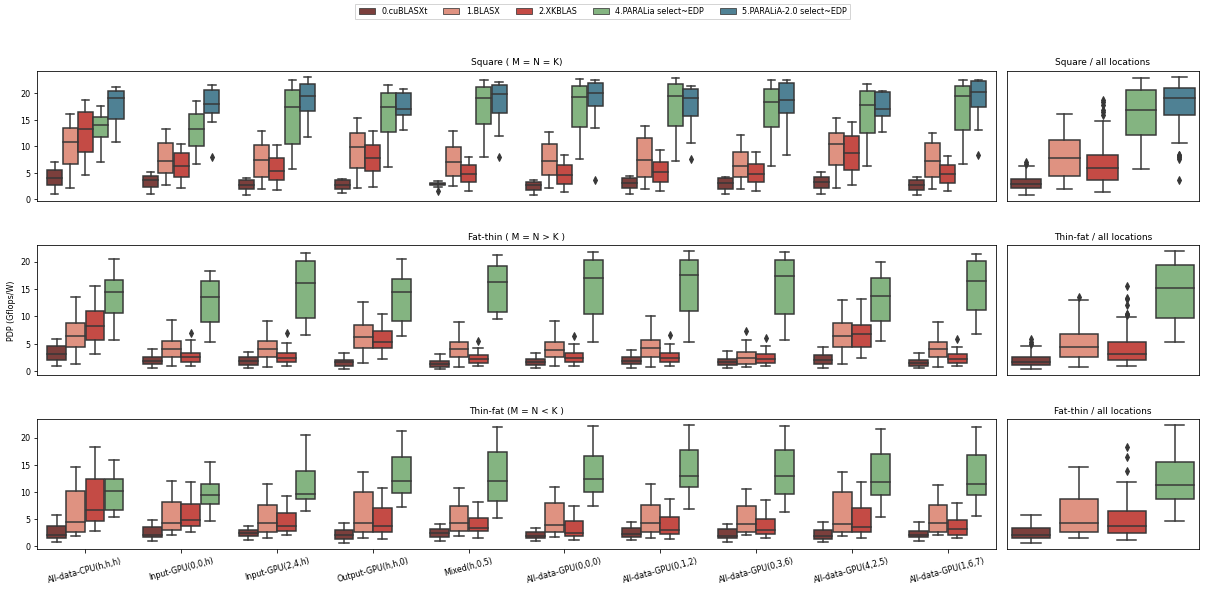

In [10]:
def CoCoPeLia_enforce_dataset_min_limits(df):
    return df.loc[((df['M']*df['N']*df['K'] >=  4096**3)) & ((df['M'] >= 1024)) & ((df['N'] >= 1024)) & ((df['K'] >= 1024)) & 
                  (df['M']*df['N']*df['K'] <(19457**3))]#248**3)) ] #

sns.set_palette(cp3_2)
sns.color_palette()

CoCopeLia_all_data_alldev = pd.concat([BLASxEx_data,XKBLAS_nocache_data])
CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,cuBLASXt_best_data])

#CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_allhops_02pen_ESPA_alldev])
#CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,PARALiA2_data_alldev])

CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_allhops_02pen_ESPA_pred_EDP])
CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,PARALiA2_data_pred_EDP])

#CoCopeLia_all_data_alldev = pd.concat([CoCopeLia_all_data_alldev,CoCopeLia_data_allhops_02pen_ESPA_pred_PDP])

CoCopeLia_all_data_mean = CoCoPeLia_enforce_dataset_min_limits(CoCoPeLia_modified_grouby_avg(CoCopeLia_all_data_alldev))
CoCopeLia_all_data_mean['PDP (Gflops/W)'] = CoCopeLia_all_data_mean['flops']/(1e9*CoCopeLia_all_data_mean['energy'])
CoCopeLia_all_data_mean['Performance (Tflops)'] = CoCopeLia_all_data_mean['perf']/1000

#print(CoCopeLia_all_data_mean.head(5))
CoCopeLia_all_data_alldev_list = []
CoCopeLia_all_data_alldev_list.append(CoCoPeLia_select_subset(CoCopeLia_all_data_mean,'square'))
CoCopeLia_all_data_alldev_list.append(CoCoPeLia_select_subset(CoCopeLia_all_data_mean,'fat-thin'))
CoCopeLia_all_data_alldev_list.append(CoCoPeLia_select_subset(CoCopeLia_all_data_mean,'thin-fat'))
#CoCopeLia_all_data_alldev_list.append(CoCopeLia_all_data_mean)

elem_name=['Square ( M = N = K)', 'Fat-thin ( M = N > K )', 'Thin-fat (M = N < K )']
fig, ax = plt.subplots(len(CoCopeLia_all_data_alldev_list),2, gridspec_kw={'width_ratios': [5, 1]})
for ctr in range(0,len(CoCopeLia_all_data_alldev_list)):
    CoCopeLia_all_data_alldev_list[ctr].loc[CoCopeLia_all_data_alldev_list[ctr]['imp'] == '3.PARALia_1.5 AllDev', 'imp'] = '3.PARALia simple'
    CoCopeLia_all_data_alldev_list[ctr].loc[CoCopeLia_all_data_alldev_list[ctr]['imp'] == '5.PARALia_1.5 PRED-EDP', 'imp'] = '4.PARALia select~EDP'
    CoCopeLia_all_data_alldev_list[ctr].loc[CoCopeLia_all_data_alldev_list[ctr]['imp'] == '7.PARALia_2 PRED-EDP', 'imp'] = '5.PARALiA-2.0 select~EDP'
    CoCopeLia_all_data_alldev_list[ctr].loc[CoCopeLia_all_data_alldev_list[ctr]['imp'] == '6.PARALia_1.5 Alldev', 'imp'] = '4.PARALiA Alldev'
    CoCopeLia_all_data_alldev_list[ctr].loc[CoCopeLia_all_data_alldev_list[ctr]['imp'] == '8.PARALia_2 Alldev', 'imp'] = '5.PARALiA-2.0 Alldev'
    CoCopeLia_all_data_alldev_list[ctr].sort_values(inplace = True, by = ['loc_str'])
    CoCopeLia_all_data_alldev_list[ctr].sort_values(inplace = True, by = ['imp'])
    sns.boxplot(data=CoCopeLia_all_data_alldev_list[ctr], x = 'loc_str', y = 'Performance (Tflops)', hue = 'imp', ax=ax[ctr][0])
    if (ctr < 3):
        ax[ctr][0].set_title(elem_name[ctr], size = font+1)   
    else:
        ax[ctr][0].set_title('All data shapes', size = font+1)    
    if(ctr!=len(CoCopeLia_all_data_alldev_list)-1): 
        ax[ctr][0].set_xticks([])
        ax[ctr][0].set_xlabel('')
    else:
        #ax[ctr][0].set_xticklabels(['[-1,-1,-1]', '[0,0,-1]', '[4,2,-1]', '[-1,-1,0]', '[-1,0,5]', '[0,0,0]', '[0,1,2]', '[0,3,6]', '[4,2,5]', '[1,6,7]'])
        ax[ctr][0].set_xticklabels(['All-data-CPU(h,h,h)', 'Input-GPU(0,0,h)', 'Input-GPU(2,4,h)','Output-GPU(h,h,0)', 'Mixed(h,0,5)', 
                                    'All-data-GPU(0,0,0)','All-data-GPU(0,1,2)','All-data-GPU(0,3,6)','All-data-GPU(4,2,5)','All-data-GPU(1,6,7)'], rotation = 15)
    if(ctr!=1):     
        ax[ctr][0].set_ylabel('')
    ax[ctr][0].get_legend().remove()
    ax[ctr][0].set_ylim([0,58])
    ax[ctr][1].set_ylim([0,58])
    #ax[ctr].set_yscale('log')
    #ax[ctr].set_ylim([0.05,100])
    #ax[ctr].set_xticks([])
    ax[ctr][0].set_xlabel('')
    sns.boxplot(data=CoCopeLia_all_data_alldev_list[ctr], x = 'imp', y = 'Performance (Tflops)', ax=ax[ctr][1])
    ax[ctr][1].set_xticks([])
    ax[ctr][1].set_yticks([])
    ax[ctr][1].set_yticklabels('')
    ax[ctr][1].set_ylabel('') 
    ax[ctr][1].set_xlabel('')
    if (ctr == 0):
        ax[ctr][1].set_title('Square / all locations', size = font+1)
    if (ctr == 1):
        ax[ctr][1].set_title('Thin-fat / all locations', size = font+1)    
    if (ctr == 2):
        ax[ctr][1].set_title('Fat-thin / all locations', size = font+1)   
    elif (ctr == 3):
        ax[ctr][1].set_title('Total Dataset', size = font+1)
                             
    if ctr == 0:     
        fig.legend(loc = 'upper center',#title="Model",  # Title for the legend
            fontsize=font, fancybox = False, ncol=6)
fig.set_size_inches(width*20/4, height*4)
fig.subplots_adjust(left=.05, bottom=.12, right=.99, top=.89, wspace=0.02, hspace=0.34)        
#fig.savefig('Plots/Plot_testbed-%s_gflops_sumup.pdf' % (machine))
fig.savefig('Plots/Plot_testbed-%s_gflops_sumup.png' % (machine)) 
fig, ax = plt.subplots(len(CoCopeLia_all_data_alldev_list),2, gridspec_kw={'width_ratios': [5, 1]})
for ctr in range(0,len(CoCopeLia_all_data_alldev_list)):
    CoCopeLia_all_data_alldev_list[ctr].loc[CoCopeLia_all_data_alldev_list[ctr]['imp'] == '3.PARALia_1.5 AllDev', 'imp'] = '3.PARALia simple'
    CoCopeLia_all_data_alldev_list[ctr].loc[CoCopeLia_all_data_alldev_list[ctr]['imp'] == '5.PARALia_1.5 PRED-EDP', 'imp'] = '4.PARALia select~EDP'
    CoCopeLia_all_data_alldev_list[ctr].loc[CoCopeLia_all_data_alldev_list[ctr]['imp'] == '7.PARALia_2 PRED-EDP', 'imp'] = '5.PARALiA-2.0 select~EDP'
    CoCopeLia_all_data_alldev_list[ctr].sort_values(inplace = True, by = ['imp'])
    sns.boxplot(data=CoCopeLia_all_data_alldev_list[ctr], x = 'loc_str', y = 'PDP (Gflops/W)', hue = 'imp', ax=ax[ctr][0])
    #ax[ctr][0].set_yscale('log') 
    if (ctr < 3):
        ax[ctr][0].set_title(elem_name[ctr], size = font+1)   
    else:
        ax[ctr][0].set_title('All data shapes', size = font+1)    
    if(ctr!=len(CoCopeLia_all_data_alldev_list)-1): 
        ax[ctr][0].set_xticks([])
        ax[ctr][0].set_xlabel('')
    else:
        #ax[ctr][0].set_xticklabels(['[-1,-1,-1]', '[0,0,-1]', '[4,2,-1]', '[-1,-1,0]', '[-1,0,5]', '[0,0,0]', '[0,1,2]', '[0,3,6]', '[4,2,5]', '[1,6,7]'])
        ax[ctr][0].set_xticklabels(['All-data-CPU(h,h,h)', 'Input-GPU(0,0,h)', 'Input-GPU(2,4,h)','Output-GPU(h,h,0)', 'Mixed(h,0,5)', 
                                    'All-data-GPU(0,0,0)','All-data-GPU(0,1,2)','All-data-GPU(0,3,6)','All-data-GPU(4,2,5)','All-data-GPU(1,6,7)'], rotation = 15)
    if(ctr!=1):     
        ax[ctr][0].set_ylabel('')
    ax[ctr][0].get_legend().remove()
    ax[ctr][0].set_xlabel('')
    sns.boxplot(data=CoCopeLia_all_data_alldev_list[ctr], x = 'imp', y = 'PDP (Gflops/W)', ax=ax[ctr][1])
    #ax[ctr][1].set_yscale('log')
    ax[ctr][1].set_yticks([])
    ax[ctr][1].set_yticklabels('')
    ax[ctr][1].minorticks_off()
    ax[ctr][1].set_xticks([])
    ax[ctr][1].set_ylabel('') 
    ax[ctr][1].set_xlabel('')
    if (ctr == 0):
        ax[ctr][1].set_title('Square / all locations', size = font+1)
    if (ctr == 1):
        ax[ctr][1].set_title('Thin-fat / all locations', size = font+1)    
    if (ctr == 2):
        ax[ctr][1].set_title('Fat-thin / all locations', size = font+1)   
    elif (ctr == 3):
        ax[ctr][1].set_title('Total Dataset', size = font+1)
                             
    if ctr == 0:     
        fig.legend(loc = 'upper center',#title="Model",  # Title for the legend
            fontsize=font, fancybox = False, ncol=6)
fig.set_size_inches(width*20/4, height*4)
fig.subplots_adjust(left=.065, bottom=.12, right=.99, top=.89, wspace=0.02, hspace=0.34)
#fig.savefig('Plots/Plot_testbed-%s_Energy_sumup.pdf' % (machine))    
fig.savefig('Plots/Plot_testbed-%s_Energy_sumup.png' % (machine)) 